In [ ]:
#           GROUP-2
#1	Adarsh Kumar Rai	2019B3A71071H
#2	Samyak Jain	2019B1A41485H
#3	Sahil Varman	2019B1A31017H
#4	Abhishek Bhansali	2019B1A41468H
#5	Yegna Priya	2019B1A31052H
#6	Rudraksh Tiwari	2019B4A41021H
#7	Pratham Jain	2019B4A40898H


#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

Tax=0.25

In [ ]:
#__________________________Top Down Approach___________________________________

In [ ]:
#Download stock prices for the target security monthly data last 5 years

BANKBARODA_df = yf.download('BANKBARODA.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

BANKBARODA_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,166.750000,167.000000,137.199997,137.850006,133.820541,259547370.0
2017-09-01,139.000000,151.000000,135.800003,137.600006,133.577850,238587844.0
2017-10-01,137.600006,206.649994,133.500000,169.899994,164.933685,335386672.0
2017-11-01,172.899994,191.850006,160.750000,169.100006,164.157089,347345652.0
2017-12-01,169.699997,172.949997,155.000000,160.649994,155.954071,186975823.0


In [ ]:
#Caclulate log returns OF BANKBARODA AND PLOT GRAPHS

BANKBARODA_df['Return_BANKBARODA'] = np.log(BANKBARODA_df['Adj Close']/BANKBARODA_df['Adj Close'].shift(1))
print(BANKBARODA_df['Return_BANKBARODA']) 

Date
2017-08-01         NaN
2017-09-01   -0.001815
2017-10-01    0.210859
2017-11-01   -0.004720
2017-12-01   -0.051262
                ...   
2022-04-01    0.011581
2022-05-01   -0.118835
2022-06-01   -0.028841
2022-06-17         NaN
2022-07-01         NaN
Name: Return_BANKBARODA, Length: 61, dtype: float64


In [ ]:
BANKBARODA_df1 = BANKBARODA_df.dropna(axis=0)
BANKBARODA_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_BANKBARODA
Date,,,,,,,
2017-09-01,139.000000,151.000000,135.800003,137.600006,133.577850,238587844.0,-0.001815
2017-10-01,137.600006,206.649994,133.500000,169.899994,164.933685,335386672.0,0.210859
2017-11-01,172.899994,191.850006,160.750000,169.100006,164.157089,347345652.0,-0.004720
2017-12-01,169.699997,172.949997,155.000000,160.649994,155.954071,186975823.0,-0.051262
2018-01-01,161.000000,179.699997,154.550003,156.800003,152.216614,273991827.0,-0.024257


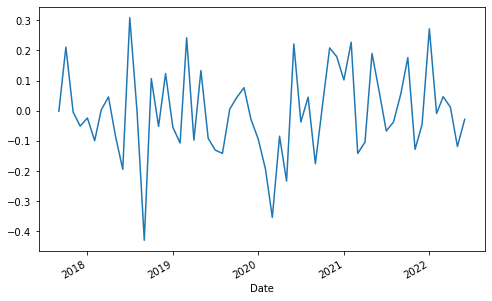

In [ ]:
BANKBARODA_df['Return_BANKBARODA'].plot(figsize=(8,5))
plt.show()

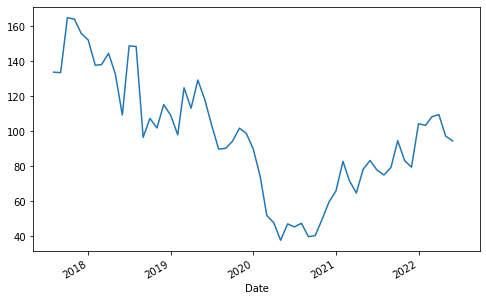

In [ ]:
BANKBARODA_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
BANKBARODA_df1_returns = BANKBARODA_df1['Return_BANKBARODA']
BANKBARODA_df1_returns.head()

Date
2017-09-01   -0.001815
2017-10-01    0.210859
2017-11-01   -0.004720
2017-12-01   -0.051262
2018-01-01   -0.024257
Name: Return_BANKBARODA, dtype: float64

In [ ]:
#Download Market index (NIFTY-50) closing prices
nifty_df = yf.download('^NSEI',start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo',
)
nifty_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,10101.049805,10137.849609,9685.549805,9917.900391,9917.900391,4168000
2017-09-01,9937.650391,10178.950195,9687.549805,9788.599609,9788.599609,4165300
2017-10-01,9893.299805,10384.500000,9831.049805,10335.299805,10335.299805,4500300
2017-11-01,10390.349609,10490.450195,10094.000000,10226.549805,10226.549805,4650900
2017-12-01,10263.700195,10552.400391,10033.349609,10530.700195,10530.700195,3504400


In [ ]:
#Calculate Absolute returns OF NIFTY-50
nifty_df['Absolute_Return_NIFTY'] = (nifty_df['Adj Close']-nifty_df['Adj Close'].shift(1))/nifty_df['Adj Close'].shift(1)
print(nifty_df['Absolute_Return_NIFTY'])

Date
2017-08-01         NaN
2017-09-01   -0.013037
2017-10-01    0.055851
2017-11-01   -0.010522
2017-12-01    0.029741
2018-01-01    0.047195
2018-02-01   -0.048501
2018-03-01   -0.036134
2018-04-01    0.061862
2018-05-01   -0.000298
2018-06-01   -0.002035
2018-07-01    0.059939
2018-08-01    0.028530
2018-09-01   -0.064214
2018-10-01   -0.049756
2018-11-01    0.047191
2018-12-01   -0.001306
2019-01-01   -0.002909
2019-02-01   -0.003550
2019-03-01    0.077035
2019-04-01    0.010689
2019-05-01    0.014866
2019-06-01   -0.011235
2019-07-01   -0.056905
2019-08-01   -0.008522
2019-09-01    0.040932
2019-10-01    0.035122
2019-11-01    0.015037
2019-12-01    0.009323
2020-01-01   -0.016958
2020-02-01   -0.063563
2020-03-01   -0.232464
2020-04-01    0.146800
2020-05-01   -0.028357
2020-06-01    0.075342
2020-07-01    0.074873
2020-08-01    0.028361
2020-09-01   -0.012290
2020-10-01    0.035105
2020-11-01    0.113941
2020-12-01    0.078094
2021-01-01   -0.024829
2021-02-01    0.065609
2021-0

In [ ]:
nifty_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Absolute_Return_NIFTY
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,59.000000
mean,12608.637484,13094.700814,12152.228377,12688.190023,12688.190023,8.432412e+06,0.009640
std,2626.273783,2744.376299,2591.738219,2638.895011,2638.895011,4.002504e+06,0.054793
min,8584.099609,9598.849609,7511.100098,8597.750000,8597.750000,2.454500e+06,-0.232464
25%,10772.499756,11023.600342,10339.887695,10779.212402,10779.212402,5.276750e+06,-0.014997
50%,11571.425293,11900.575195,11099.225098,11633.150391,11633.150391,6.993200e+06,0.008901
75%,14726.475098,15475.399902,14302.362793,14913.725098,14913.725098,1.172128e+07,0.040439
max,17783.150391,18604.449219,17452.900391,17671.650391,17671.650391,2.130300e+07,0.146800


In [ ]:
Monthly_R_m = nifty_df.describe()['Absolute_Return_NIFTY'][1]
print(Monthly_R_m)

0.009640238604874752


In [ ]:
R_m = pow(1+Monthly_R_m,12)-1
print(R_m)

0.12201796210179561


In [ ]:
#Calculate Log returns OF NIFTY-50
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2017-08-01         NaN
2017-09-01   -0.013123
2017-10-01    0.054347
2017-11-01   -0.010578
2017-12-01    0.029308
2018-01-01    0.046115
2018-02-01   -0.049716
2018-03-01   -0.036803
2018-04-01    0.060024
2018-05-01   -0.000298
2018-06-01   -0.002037
2018-07-01    0.058211
2018-08-01    0.028131
2018-09-01   -0.066368
2018-10-01   -0.051036
2018-11-01    0.046111
2018-12-01   -0.001306
2019-01-01   -0.002913
2019-02-01   -0.003556
2019-03-01    0.074212
2019-04-01    0.010632
2019-05-01    0.014757
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-0

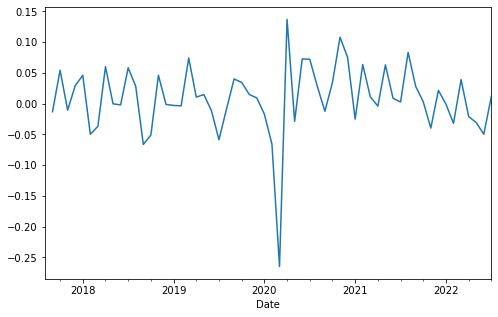

In [ ]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

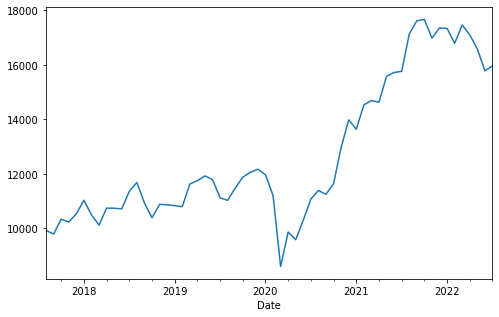

In [ ]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Absolute_Return_NIFTY,Return_NIFTY
Date,,,,,,,,
2017-09-01,9937.650391,10178.950195,9687.549805,9788.599609,9788.599609,4165300,-0.013037,-0.013123
2017-10-01,9893.299805,10384.500000,9831.049805,10335.299805,10335.299805,4500300,0.055851,0.054347
2017-11-01,10390.349609,10490.450195,10094.000000,10226.549805,10226.549805,4650900,-0.010522,-0.010578
2017-12-01,10263.700195,10552.400391,10033.349609,10530.700195,10530.700195,3504400,0.029741,0.029308
2018-01-01,10477.549805,11171.549805,10404.650391,11027.700195,11027.700195,4560600,0.047195,0.046115


In [ ]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2017-09-01   -0.013123
2017-10-01    0.054347
2017-11-01   -0.010578
2017-12-01    0.029308
2018-01-01    0.046115
Name: Return_NIFTY, dtype: float64

In [ ]:
returns_BANKBARODA = pd.merge(nifty_df1_returns,BANKBARODA_df1_returns,how='inner',on='Date')
returns_BANKBARODA.head()
returns_BANKBARODA.describe()

,Return_NIFTY,Return_BANKBARODA
count,58.000000,58.000000
mean,0.008007,-0.005989
std,0.056973,0.147628
min,-0.264569,-0.429953
25%,-0.016108,-0.097094
50%,0.005947,-0.016799
75%,0.039879,0.072789
max,0.136976,0.308437


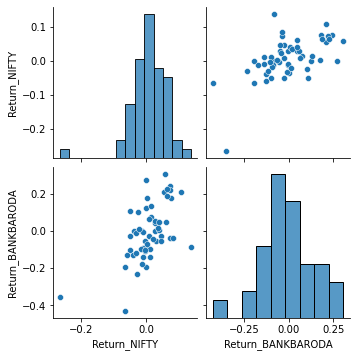

In [ ]:
sns.pairplot(returns_BANKBARODA)
plt.show()

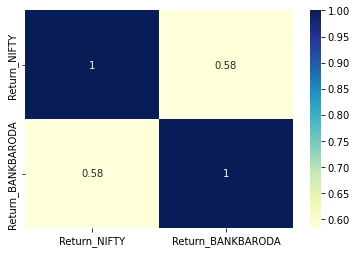

In [ ]:
sns.heatmap(returns_BANKBARODA.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns_BANKBARODA['Return_NIFTY']
y = returns_BANKBARODA['Return_BANKBARODA']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Return_BANKBARODA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     28.81
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.58e-06
Time:                        23:55:44   Log-Likelihood:                 41.199
No. Observations:                  58   AIC:                            -78.40
Df Residuals:                      56   BIC:                            -74.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0181      0.016     -1.126      0.265      -0.050       0.014
Return_NIFTY     1.5102      0.281      5.367      0.000       0.947       2.074
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.014
Skew:                          -0.003   Prob(JB):                        0.993
Kurtosis:                       3.077   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2017-09-01 to 2022-06-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Return_NIFTY       58 non-null     float64
 1   Return_BANKBARODA  58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
resid Date
2017-09-01    0.036084
2017-10-01    0.146866
2017-11-01    0.029336
2017-12-01   -0.077441
2018-01-01   -0.075820
2018-02-01   -0.006334
2018-03-01    0.076124
2018-04-01   -0.026893
2018-05-01   -0.066194
2018-06-01   -0.173442
2018-07-01    0.238608
2018-08-01   -0.027013
2018-09-01   -0.311643
2018-10-01    0.201370
2018-11-01   -0.103491
2018-12-01    0.143059
2019-01-01   -0.032452
2019-02-01   -0.083936
2019-03-01    0.147981
2019-04-01   -0.095894
2019-05-01    0.128845
2019-06-01   -0.056346
2019-07-01   -0.024154
2019-08-01   -0.110725
2019-09-01   -0.037654
2019-10-01    0.009584
2019-11-01    0.071778
2019-12-01   -

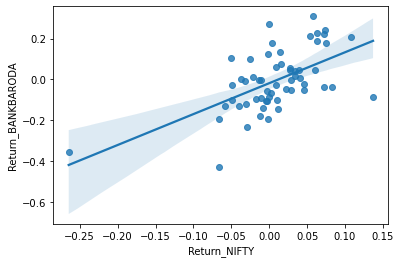

In [ ]:
BARODA_Lev_Beta_TopDown = 1.5102

#Regression - Security Characteristic line
returns_BANKBARODA.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_BANKBARODA', data = returns_BANKBARODA)

print('resid', results.resid)

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.800000e+01
mean    -4.067627e-18
std      1.199630e-01
min     -3.116428e-01
25%     -7.703073e-02
50%     -2.123474e-02
75%      7.061970e-02
max      2.911641e-01
dtype: float64

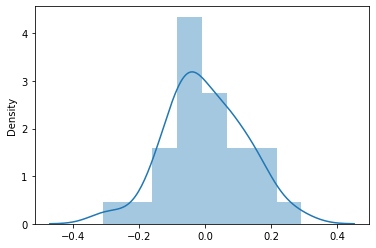

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.2121786593492634, 'Test Statistic p-value': 0.5454798954412432, 'F-Statistic': 0.5870081356377436, 'F-Test p-value': 0.5594333834737112}


After performing white's test we have obtained a p-value which is greater than 5%( 54.54% > 5% ). Thus, we cannot reject the null hypothesis of homoskedasticity in variances in the error terms. Thus, the beta is statistically significant.  

NormaltestResult(statistic=0.28006344354996937, pvalue=0.8693306582498818)

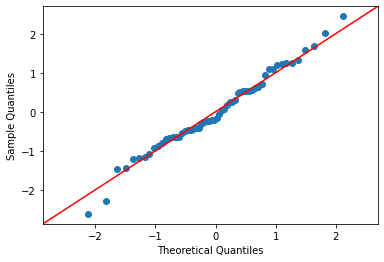

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 86.933% > 5% ). Thus, we cannot reject the null hypothesis and the error terms follow a normal distribution.

In [ ]:
#For risk free cost of debt we will choose Indian Government bonds

Bond_df = pd.read_excel(r"C:\Users\Adarsh\10_year_yield.xlsx")
print(Bond_df)

   Month Begin Date Month End Date  10 Year Yield(in %)
0        2017-07-01     2017-07-28                6.487
1        2017-07-29     2017-08-25                6.506
2        2017-08-26     2017-09-29                6.594
3        2017-09-30     2017-10-27                6.749
4        2017-10-28     2017-11-24                6.950
5        2017-11-25     2017-12-29                7.155
6        2017-12-30     2018-01-26                7.408
7        2018-01-27     2018-02-23                7.532
8        2018-02-24     2018-03-30                7.583
9        2018-03-31     2018-04-27                7.435
10       2018-04-28     2018-05-25                7.777
11       2018-05-26     2018-06-29                7.861
12       2018-06-30     2018-07-27                7.802
13       2018-07-28     2018-08-31                7.807
14       2018-09-01     2018-09-28                8.081
15       2018-09-29     2018-10-26                7.970
16       2018-10-27     2018-11-30              

In [ ]:
Bond_df.describe()

,10 Year Yield(in %)
count,57.000000
mean,6.775667
std,0.630439
min,5.823000
25%,6.347000
50%,6.665000
75%,7.348000
max,8.081000


In [ ]:
#Since we don't know the average duration of Bank of Baroda's total debt we will consider it to be 10 years for our analysis.
#Hence we shall take the Yield on 10 year Indian Government bonds(6.775667%) to be our risk free rate for cost of debt.

R_f = Bond_df.describe()['10 Year Yield(in %)'][1] / 100
print(R_f)

0.06775666666666666


In [ ]:
print(BARODA_Lev_Beta_TopDown,",", R_m)

1.5102 , 0.12201796210179561


In [ ]:
BANKBARODA_CostOfEquity_TopDown = R_f + BARODA_Lev_Beta_TopDown*(R_m - R_f)
print(BANKBARODA_CostOfEquity_TopDown)

0.1497020750327984


In [ ]:
#Thus using the CAPM model, the cost of equity for Bank of Baroda using the TOP DOWN approach comes out to be 14.97%(approx)

In [ ]:
#__________________________Bottom Up Approach____________________________________

In [ ]:
#Download stock prices for the security monthly data last 5 years

HDFCBANK_df = yf.download('HDFCBANK.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

HDFCBANK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,890.924988,904.575012,865.575012,888.224976,861.401184,51268730.0
2017-09-01,890.500000,934.000000,869.000000,902.849976,875.584534,78112874.0
2017-10-01,902.849976,939.799988,878.924988,904.250000,876.942322,67360708.0
2017-11-01,907.549988,937.750000,894.000000,926.849976,898.859802,50919926.0
2017-12-01,927.450012,951.549988,899.500000,936.200012,907.927490,59433142.0


In [ ]:
SBIN_df = yf.download('SBIN.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

SBIN_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,314.000000,314.799988,271.200012,277.750000,270.980194,337859310.0
2017-09-01,277.649994,280.399994,249.500000,253.850006,247.662720,251103632.0
2017-10-01,253.850006,351.299988,241.149994,305.799988,298.346466,635028553.0
2017-11-01,309.399994,346.700012,306.649994,320.350006,312.541870,523180524.0
2017-12-01,321.500000,323.850006,300.399994,309.899994,302.346558,308352494.0


In [ ]:
ICICIBANK_df = yf.download('ICICIBANK.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

ICICIBANK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,303.899994,305.200012,261.549988,298.049988,291.164368,230083469.0
2017-09-01,299.700012,300.000000,269.149994,276.600006,270.209900,265346113.0
2017-10-01,276.600006,314.649994,255.000000,300.100006,293.167023,484037908.0
2017-11-01,303.000000,332.350006,302.399994,307.549988,300.444885,338858264.0
2017-12-01,309.700012,319.200012,287.000000,314.000000,306.745911,223570224.0


In [ ]:
AXISBANK_df = yf.download('AXISBANK.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

AXISBANK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,518.200012,524.049988,480.000000,500.350006,498.969879,126971719.0
2017-09-01,502.000000,526.000000,488.299988,509.149994,507.745575,130335638.0
2017-10-01,509.149994,534.650024,447.500000,523.150024,521.706970,286776172.0
2017-11-01,524.950012,565.900024,523.000000,535.400024,533.923157,221425370.0


In [ ]:
KOTAKBANK_df = yf.download('KOTAKBANK.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

KOTAKBANK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1024.00,1024.000000,962.000000,976.000000,974.492615,31459591.0
2017-09-01,979.00,1045.400024,968.000000,1002.250000,1000.702026,40089825.0
2017-10-01,1002.25,1115.050049,985.150024,1025.050049,1023.466858,41899920.0
2017-11-01,1032.00,1050.000000,982.549988,1000.299988,998.755127,37039986.0


In [ ]:
INDUSINDBK_df = yf.download('INDUSINDBK.NS', 
                      start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo'
)

INDUSINDBK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1654.599976,1684.0,1594.300049,1656.750000,1627.227905,16414984.0
2017-09-01,1661.000000,1804.0,1641.199951,1682.199951,1652.224487,27277170.0
2017-10-01,1682.199951,1758.0,1572.400024,1627.150024,1598.155396,29613406.0
2017-11-01,1641.000000,1692.0,1592.500000,1661.949951,1632.335327,28459537.0


In [ ]:
#Download Market index (NIFTY-50) closing prices
nifty_df = yf.download('^NSEI',start='2017-07-06', 
                      end='2022-07-06', 
                      progress=False,interval ='1mo',
)
nifty_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,10101.049805,10137.849609,9685.549805,9917.900391,9917.900391,4168000
2017-09-01,9937.650391,10178.950195,9687.549805,9788.599609,9788.599609,4165300
2017-10-01,9893.299805,10384.500000,9831.049805,10335.299805,10335.299805,4500300
2017-11-01,10390.349609,10490.450195,10094.000000,10226.549805,10226.549805,4650900
2017-12-01,10263.700195,10552.400391,10033.349609,10530.700195,10530.700195,3504400


In [ ]:
#Calculate Log returns OF NIFTY-50
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2017-08-01         NaN
2017-09-01   -0.013123
2017-10-01    0.054347
2017-11-01   -0.010578
2017-12-01    0.029308
2018-01-01    0.046115
2018-02-01   -0.049716
2018-03-01   -0.036803
2018-04-01    0.060024
2018-05-01   -0.000298
2018-06-01   -0.002037
2018-07-01    0.058211
2018-08-01    0.028131
2018-09-01   -0.066368
2018-10-01   -0.051036
2018-11-01    0.046111
2018-12-01   -0.001306
2019-01-01   -0.002913
2019-02-01   -0.003556
2019-03-01    0.074212
2019-04-01    0.010632
2019-05-01    0.014757
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-0

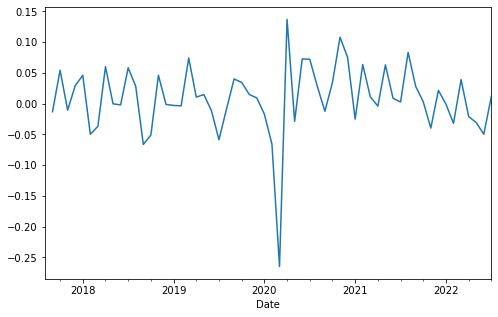

In [ ]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

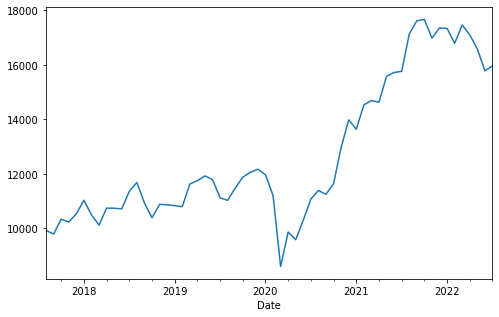

In [ ]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2017-09-01,9937.650391,10178.950195,9687.549805,9788.599609,9788.599609,4165300,-0.013123
2017-10-01,9893.299805,10384.500000,9831.049805,10335.299805,10335.299805,4500300,0.054347
2017-11-01,10390.349609,10490.450195,10094.000000,10226.549805,10226.549805,4650900,-0.010578
2017-12-01,10263.700195,10552.400391,10033.349609,10530.700195,10530.700195,3504400,0.029308
2018-01-01,10477.549805,11171.549805,10404.650391,11027.700195,11027.700195,4560600,0.046115


In [ ]:
#Caclulate log returns OF SBIN AND PLOT GRAPHS

SBIN_df['Return_SBIN'] = np.log(SBIN_df['Adj Close']/SBIN_df['Adj Close'].shift(1))
print(SBIN_df['Return_SBIN']) 

Date
2017-08-01         NaN
2017-09-01   -0.089978
2017-10-01    0.186188
2017-11-01    0.046483
2017-12-01   -0.033165
                ...   
2022-04-01    0.005556
2022-05-01   -0.058499
2022-05-25         NaN
2022-06-01         NaN
2022-07-01    0.043266
Name: Return_SBIN, Length: 62, dtype: float64


In [ ]:
SBIN_df1 = SBIN_df.dropna(axis=0)
SBIN_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_SBIN
Date,,,,,,,
2017-09-01,277.649994,280.399994,249.500000,253.850006,247.662720,251103632.0,-0.089978
2017-10-01,253.850006,351.299988,241.149994,305.799988,298.346466,635028553.0,0.186188
2017-11-01,309.399994,346.700012,306.649994,320.350006,312.541870,523180524.0,0.046483
2017-12-01,321.500000,323.850006,300.399994,309.899994,302.346558,308352494.0,-0.033165
2018-01-01,310.600006,332.750000,292.600006,313.250000,305.614899,467226485.0,0.010752


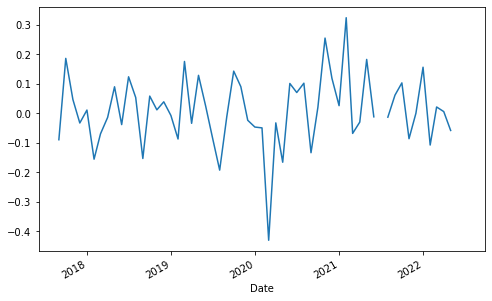

In [ ]:
SBIN_df['Return_SBIN'].plot(figsize=(8,5))
plt.show()

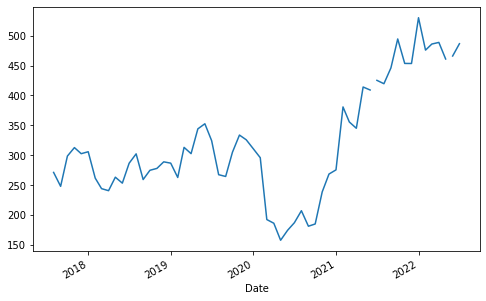

In [ ]:
SBIN_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
SBIN_df1_returns = SBIN_df1['Return_SBIN']
SBIN_df1_returns.head()

Date
2017-09-01   -0.089978
2017-10-01    0.186188
2017-11-01    0.046483
2017-12-01   -0.033165
2018-01-01    0.010752
Name: Return_SBIN, dtype: float64

In [ ]:
returns_SBIN = pd.merge(nifty_df1_returns,SBIN_df1_returns,how='inner',on='Date')
returns_SBIN.head()
returns_SBIN.describe()

,Return_NIFTY,Return_SBIN
count,57.000000,57.000000
mean,0.009180,0.009397
std,0.056945,0.120169
min,-0.264569,-0.431291
25%,-0.013123,-0.049733
50%,0.009280,0.005556
75%,0.040116,0.089798
max,0.136976,0.324270


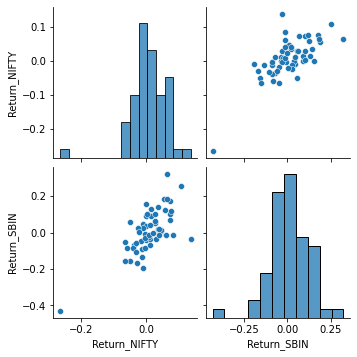

In [ ]:
sns.pairplot(returns_SBIN)
plt.show()

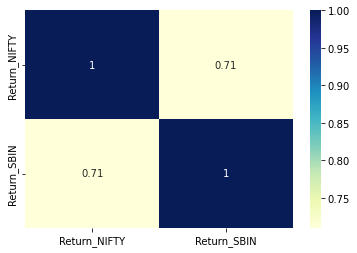

In [ ]:
sns.heatmap(returns_SBIN.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns_SBIN['Return_NIFTY']
y = returns_SBIN['Return_SBIN']
x_sm = sm.add_constant(x)
#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_SBIN   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     55.95
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           6.18e-10
Time:                        23:55:54   Log-Likelihood:                 60.398
No. Observations:                  57   AIC:                            -116.8
Df Residuals:                      55   BIC:                            -112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0044      0.011     -0.380      0.705      -0.027       0.019
Return_NIFTY     1.4985      0.200      7.480      0.000       1.097       1.900
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.569
Skew:                           0.027   Prob(JB):                        0.752
Kurtosis:                       3.486   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
SBI_Lev_Beta = 1.4992

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  57 non-null     float64
 1   Return_SBIN   57 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


<AxesSubplot:xlabel='Return_NIFTY', ylabel='Return_SBIN'>

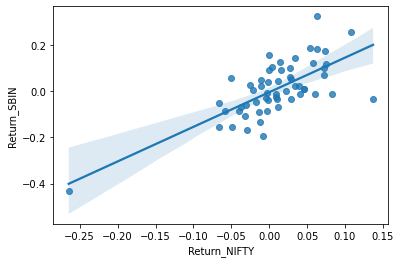

In [ ]:
#Regression - Security Characteristic line
returns_SBIN.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_SBIN', data = returns_SBIN)

resid Date
2017-09-01   -0.065954
2017-10-01    0.109106
2017-11-01    0.066694
2017-12-01   -0.072724
2018-01-01   -0.053995
2018-02-01   -0.077154
2018-03-01   -0.010416
2018-04-01   -0.099693
2018-05-01    0.094603
2018-06-01   -0.031163
2018-07-01    0.040827
2018-08-01    0.015608
2018-09-01   -0.049852
2018-10-01    0.139001
2018-11-01   -0.053257
2018-12-01    0.045078
2019-01-01    0.001092
2019-02-01   -0.077803
2019-03-01    0.068915
2019-04-01   -0.045825
2019-05-01    0.110885
2019-06-01    0.045810
2019-07-01    0.008323
2019-08-01   -0.175972
2019-09-01   -0.066956
2019-10-01    0.095535
2019-11-01    0.072081
2019-12-01   -0.033527
2020-01-01   -0.016938
2020-02-01    0.053040
2020-03-01   -0.030466
2020-04-01   -0.233693
2020-05-01   -0.118919
2020-06-01   -0.003450
2020-07-01   -0.033521
2020-08-01    0.064411
2020-09-01   -0.111181
2020-10-01   -0.026792
2020-11-01    0.097784
2020-12-01    0.010074
2021-01-01    0.067708
2021-02-01    0.233402
2021-03-01   -0.080765


C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.700000e+01
mean     4.869399e-18
std      8.460939e-02
min     -2.336929e-01
25%     -5.325664e-02
50%     -1.041637e-02
75%      6.441094e-02
max      2.334024e-01
dtype: float64

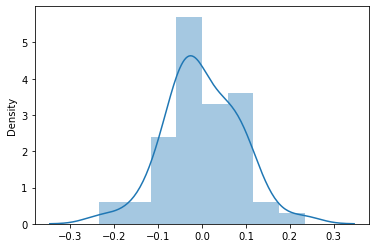

In [ ]:
print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 8.55589831526858, 'Test Statistic p-value': 0.013871080335054244, 'F-Statistic': 4.768573396522718, 'F-Test p-value': 0.012384640006329772}


NormaltestResult(statistic=1.2623032439402844, pvalue=0.5319788096226605)

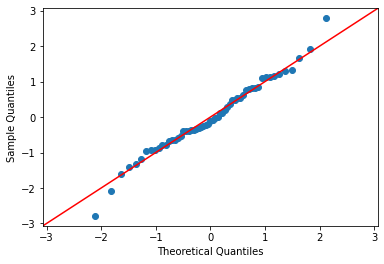

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 86.933% > 5% ). Thus, we cannot reject the null hypothesis and the error terms follow a normal distribution.

In [ ]:
#Caclulate log returns OF ICICIBANK AND PLOT GRAPHS

ICICIBANK_df['Return_ICICIBANK'] = np.log(ICICIBANK_df['Adj Close']/ICICIBANK_df['Adj Close'].shift(1))
print(ICICIBANK_df['Return_ICICIBANK']) 

Date
2017-08-01         NaN
2017-09-01   -0.074689
2017-10-01    0.081543
2017-11-01    0.024522
2017-12-01    0.020755
                ...   
2022-03-01   -0.016837
2022-04-01    0.017644
2022-05-01    0.012766
2022-06-01   -0.062552
2022-07-01    0.063017
Name: Return_ICICIBANK, Length: 66, dtype: float64


In [ ]:
ICICIBANK_df1 = ICICIBANK_df.dropna(axis=0)
ICICIBANK_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_ICICIBANK
Date,,,,,,,
2017-09-01,299.700012,300.000000,269.149994,276.600006,270.209900,265346113.0,-0.074689
2017-10-01,276.600006,314.649994,255.000000,300.100006,293.167023,484037908.0,0.081543
2017-11-01,303.000000,332.350006,302.399994,307.549988,300.444885,338858264.0,0.024522
2017-12-01,309.700012,319.200012,287.000000,314.000000,306.745911,223570224.0,0.020755
2018-01-01,314.000000,365.700012,307.500000,352.950012,344.796082,364937739.0,0.116933


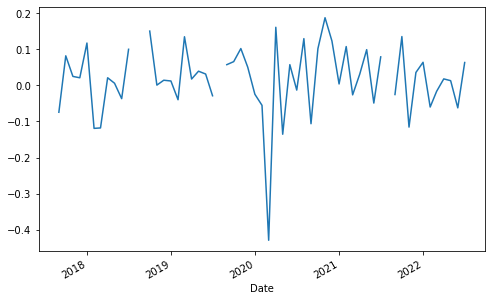

In [ ]:
ICICIBANK_df['Return_ICICIBANK'].plot(figsize=(8,5))
plt.show()

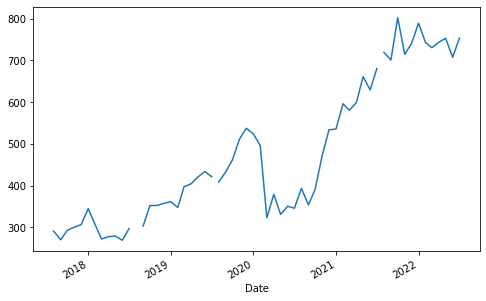

In [ ]:
ICICIBANK_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
ICICIBANK_df1_returns = ICICIBANK_df1['Return_ICICIBANK']
ICICIBANK_df1_returns.head()

Date
2017-09-01   -0.074689
2017-10-01    0.081543
2017-11-01    0.024522
2017-12-01    0.020755
2018-01-01    0.116933
Name: Return_ICICIBANK, dtype: float64

In [ ]:
returns_ICICIBANK= pd.merge(nifty_df1_returns,ICICIBANK_df1_returns,how='inner',on='Date')
returns_ICICIBANK.head()
returns_ICICIBANK.describe()

,Return_NIFTY,Return_ICICIBANK
count,55.000000,55.000000
mean,0.007994,0.016481
std,0.056626,0.098464
min,-0.264569,-0.429121
25%,-0.015113,-0.027772
50%,0.008861,0.020755
75%,0.039642,0.080079
max,0.136976,0.187044


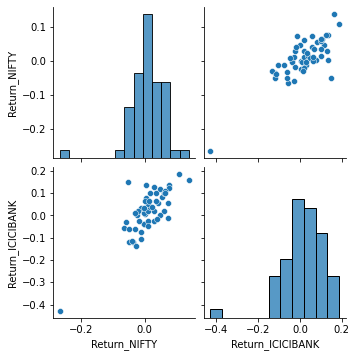

In [ ]:
sns.pairplot(returns_ICICIBANK)
plt.show()

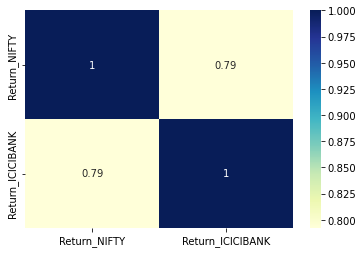

In [ ]:
sns.heatmap(returns_ICICIBANK.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns_ICICIBANK['Return_NIFTY']
y = returns_ICICIBANK['Return_ICICIBANK']
x_sm = sm.add_constant(x)
#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Return_ICICIBANK   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     89.33
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.82e-13
Time:                        23:55:57   Log-Likelihood:                 77.123
No. Observations:                  55   AIC:                            -150.2
Df Residuals:                      53   BIC:                            -146.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0055      0.008      0.662      0.511      -0.011       0.022
Return_NIFTY     1.3776      0.146      9.451      0.000       1.085       1.670
==============================================================================
Omnibus:                        8.484   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.151
Skew:                           0.624   Prob(JB):                       0.0103
Kurtosis:                       4.561   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ICICI_Lev_Beta =1.3813

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Return_NIFTY      55 non-null     float64
 1   Return_ICICIBANK  55 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
resid Date
2017-09-01   -0.062081
2017-10-01    0.001208
2017-11-01    0.033624
2017-12-01   -0.025087
2018-01-01    0.047937
2018-02-01   -0.056307
2018-03-01   -0.072893
2018-04-01   -0.067356
2018-05-01    0.000555
2018-06-01   -0.039730
2018-07-01    0.013967
2018-10-01    0.214840
2018-11-01   -0.068568
2018-12-01    0.010311
2019-01-01    0.010413
2019-02-01   -0.040598
2019-03-01    0.026652
2019-04-01   -0.002789
2019-05-01    0.013187
2019-06-01    0.041231
2019-07-01    0.046225
2019-09-01   -0.003682
2019-10-01    0.012461
2019-11-01    0.075631
2019-12-01    0.031781
2020-01-01   -0.006803
2020-02-01    0.029456
2020-03-01   -0.07

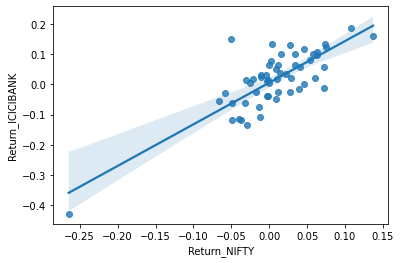

In [ ]:
#Regression - Security Characteristic line
returns_ICICIBANK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_ICICIBANK', data = returns_ICICIBANK)

print('resid', results.resid)

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.500000e+01
mean    -4.920307e-18
std      6.008485e-02
min     -1.182518e-01
25%     -4.784139e-02
50%      6.354563e-03
75%      3.327705e-02
max      2.148400e-01
dtype: float64

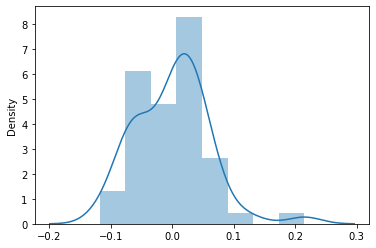

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.882235067168709, 'Test Statistic p-value': 0.3901915394665872, 'F-Statistic': 0.9213134590333373, 'F-Test p-value': 0.4043939809630561}


NormaltestResult(statistic=8.48413673596479, pvalue=0.014377822439094853)

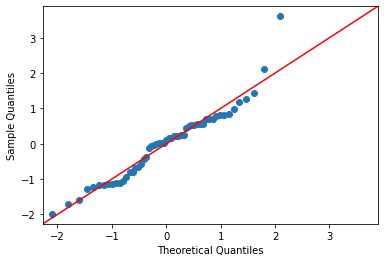

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is lesser than 5%( 86.933% > 5% ). Thus, we can reject the null hypothesis and the error terms will not follow a normal distribution. Thus, the beta is statistically insignificant.

In [ ]:
#Caclulate log returns OF INDUSIND AND PLOT GRAPHS

INDUSINDBK_df['Return_INDUSINDBK'] = np.log(INDUSINDBK_df['Adj Close']/INDUSINDBK_df['Adj Close'].shift(1))
print(INDUSINDBK_df['Return_INDUSINDBK']) 

Date
2017-07-18         NaN
2017-08-01         NaN
2017-09-01    0.015245
2017-10-01   -0.033272
2017-11-01    0.021162
                ...   
2022-03-01    0.015840
2022-04-01    0.045098
2022-05-01   -0.049974
2022-06-01   -0.158574
2022-07-01    0.030621
Name: Return_INDUSINDBK, Length: 65, dtype: float64


In [ ]:
INDUSINDBK_df1 = INDUSINDBK_df.dropna(axis=0)
INDUSINDBK_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_INDUSINDBK
Date,,,,,,,
2017-09-01,1661.000000,1804.000000,1641.199951,1682.199951,1652.224487,27277170.0,0.015245
2017-10-01,1682.199951,1758.000000,1572.400024,1627.150024,1598.155396,29613406.0,-0.033272
2017-11-01,1641.000000,1692.000000,1592.500000,1661.949951,1632.335327,28459537.0,0.021162
2017-12-01,1660.849976,1697.300049,1630.199951,1648.900024,1619.517822,23034204.0,-0.007883
2018-01-01,1652.000000,1761.000000,1618.099976,1753.099976,1721.861084,28755497.0,0.061277


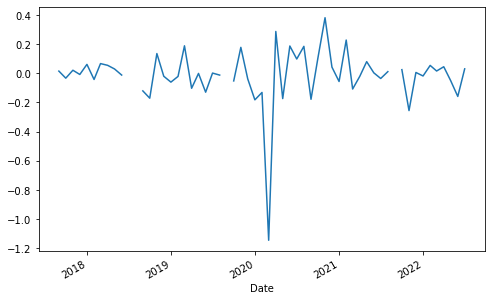

In [ ]:
INDUSINDBK_df['Return_INDUSINDBK'].plot(figsize=(8,5))
plt.show()

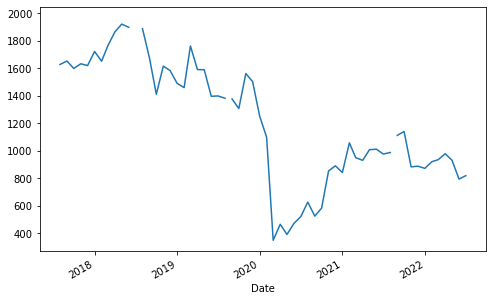

In [ ]:
INDUSINDBK_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
INDUSINDBK_df1_returns = INDUSINDBK_df1['Return_INDUSINDBK']
INDUSINDBK_df1_returns.head()

returns_INDUSINDBK = pd.merge(nifty_df1_returns,INDUSINDBK_df1_returns,how='inner',on='Date')
returns_INDUSINDBK.head()
returns_INDUSINDBK.describe()


,Return_NIFTY,Return_INDUSINDBK
count,55.000000,55.000000
mean,0.005850,-0.014474
std,0.057803,0.196637
min,-0.264569,-1.145100
25%,-0.019030,-0.054158
50%,0.002639,-0.000716
75%,0.036844,0.054526
max,0.136976,0.381388


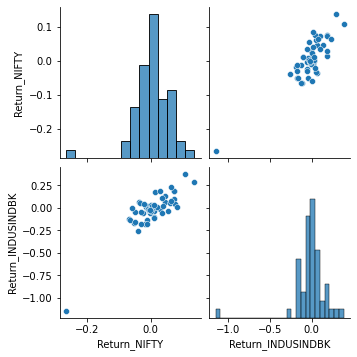

In [ ]:
sns.pairplot(returns_INDUSINDBK)
plt.show()

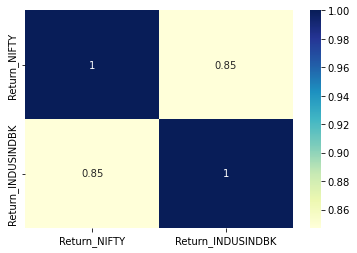

In [ ]:
sns.heatmap(returns_INDUSINDBK.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns_INDUSINDBK['Return_NIFTY']
y = returns_INDUSINDBK['Return_INDUSINDBK']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Return_INDUSINDBK   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     134.7
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.55e-16
Time:                        23:56:01   Log-Likelihood:                 46.696
No. Observations:                  55   AIC:                            -89.39
Df Residuals:                      53   BIC:                            -85.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0313      0.014     -2.192      0.033      -0.060      -0.003
Return_NIFTY     2.8820      0.248     11.608      0.000       2.384       3.380
==============================================================================
Omnibus:                        5.265   Durbin-Watson:                   2.461
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.520
Skew:                          -0.474   Prob(JB):                        0.104
Kurtosis:                       4.036   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Return_NIFTY       55 non-null     float64
 1   Return_INDUSINDBK  55 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
resid Date
2017-09-01    0.084397
2017-10-01   -0.158566
2017-11-01    0.082979
2017-12-01   -0.061015
2018-01-01   -0.040294
2018-02-01    0.132468
2018-03-01    0.204137
2018-04-01   -0.086833
2018-05-01    0.062011
2018-06-01    0.025243
2018-09-01    0.102040
2018-10-01    0.007901
2018-11-01    0.033883
2018-12-01    0.014980
2019-01-01   -0.020679
2019-02-01    0.020301
2019-03-01    0.006191
2019-04-01   -0.101866
2019-05-01   -0.011912
2019-06-01   -0.065504
2019-07-01    0.201848
2019-08-01    0.043821
2019-10-01   -0.120336
2019-11-01    0.166354
2019-12-01   -0.033805
2020-01-01   -0.101288
2020-02-01    0.089388
2020-03-01   -

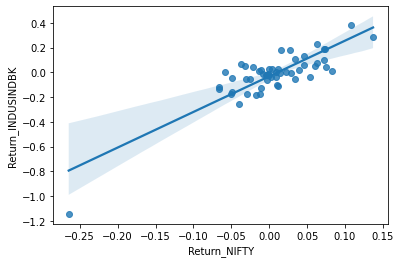

In [ ]:
INDUSIND_Lev_Beta = 2.8846
#Regression - Security Characteristic line
returns_INDUSINDBK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_INDUSINDBK', data = returns_INDUSINDBK)
print('resid', results.resid)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Return_NIFTY       55 non-null     float64
 1   Return_INDUSINDBK  55 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
resid Date
2017-09-01    0.084397
2017-10-01   -0.158566
2017-11-01    0.082979
2017-12-01   -0.061015
2018-01-01   -0.040294
2018-02-01    0.132468
2018-03-01    0.204137
2018-04-01   -0.086833
2018-05-01    0.062011
2018-06-01    0.025243
2018-09-01    0.102040
2018-10-01    0.007901
2018-11-01    0.033883
2018-12-01    0.014980
2019-01-01   -0.020679
2019-02-01    0.020301
2019-03-01    0.006191
2019-04-01   -0.101866
2019-05-01   -0.011912
2019-06-01   -0.065504
2019-07-01    0.201848
2019-08-01    0.043821
2019-10-01   -0.120336
2019-11-01    0.166354
2019-12-01   -0.033805
2020-01-01   -0.101288
2020-02-01    0.089388
2020-03-01   -

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=5.264991560640966, pvalue=0.07189879453000708)

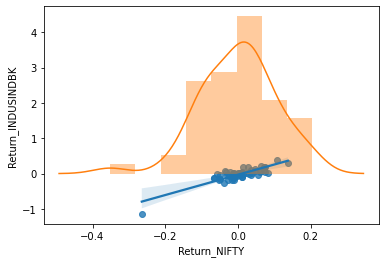

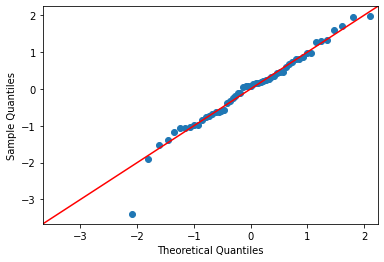

In [ ]:
INDUSIND_Lev_Beta = 2.8846
#Regression - Security Characteristic line
returns_INDUSINDBK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_INDUSINDBK', data = returns_INDUSINDBK)

print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 7.189% > 5% ). Thus, we cannot reject the null hypothesis and 
the it will give a normal distribution.

Date
2017-08-01         NaN
2017-09-01    0.016331
2017-10-01    0.001550
2017-11-01    0.024686
2017-12-01    0.010037
                ...   
2022-04-01   -0.060089
2022-05-01    0.003137
2022-05-12         NaN
2022-06-01         NaN
2022-07-01    0.007281
Name: Return_HDFCBANK, Length: 65, dtype: float64


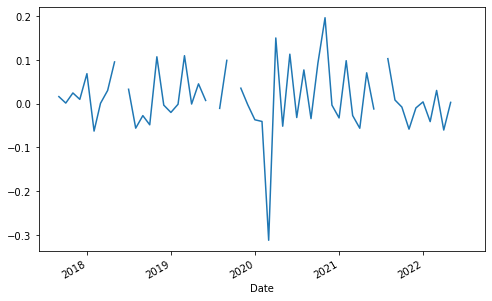

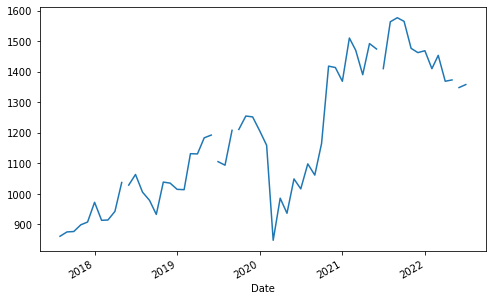

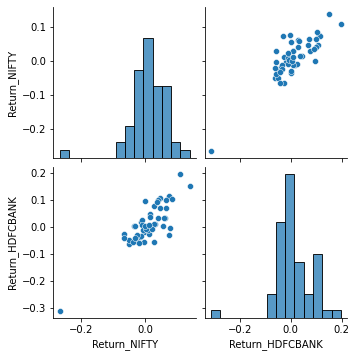

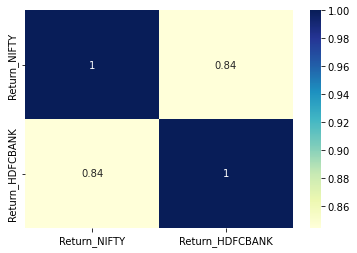

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Return_HDFCBANK   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.05e-15
Time:                        23:56:04   Log-Likelihood:                 98.019
No. Observations:                  54   AIC:                            -192.0
Df Residuals:                      52   BIC:                            -188.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.658e-05      0.006      0.008      0.993      -0.011       0.011
Return_NIFTY     1.0868      0.096     11.363      0.000       0.895       1.279
==============================================================================
Omnibus:                        1.880   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.061
Skew:                          -0.228   Prob(JB):                        0.588
Kurtosis:                       3.513   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Caclulate log returns OF HDFCBANK AND PLOT GRAPHS

HDFCBANK_df['Return_HDFCBANK'] = np.log(HDFCBANK_df['Adj Close']/HDFCBANK_df['Adj Close'].shift(1))
print(HDFCBANK_df['Return_HDFCBANK']) 

HDFCBANK_df1 = HDFCBANK_df.dropna(axis=0)
HDFCBANK_df1.head()

HDFCBANK_df['Return_HDFCBANK'].plot(figsize=(8,5))
plt.show()

HDFCBANK_df['Adj Close'].plot(figsize=(8,5))
plt.show()

HDFCBANK_df1_returns = HDFCBANK_df1['Return_HDFCBANK']
HDFCBANK_df1_returns.head()

returns_HDFCBANK = pd.merge(nifty_df1_returns,HDFCBANK_df1_returns,how='inner',on='Date')
returns_HDFCBANK.head()
returns_HDFCBANK.describe()

sns.pairplot(returns_HDFCBANK)
plt.show()

sns.heatmap(returns_HDFCBANK.corr(), annot = True, cmap="YlGnBu")
plt.show()

x = returns_HDFCBANK['Return_NIFTY']
y = returns_HDFCBANK['Return_HDFCBANK']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Return_NIFTY     54 non-null     float64
 1   Return_HDFCBANK  54 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
resid Date
2017-09-01    0.030547
2017-10-01   -0.057564
2017-11-01    0.036136
2017-12-01   -0.021862
2018-01-01    0.018605
2018-02-01   -0.008503
2018-03-01    0.040961
2018-04-01   -0.034892
2018-05-01    0.095924
2018-07-01   -0.030170
2018-08-01   -0.086427
2018-09-01    0.044965
2018-10-01    0.007273
2018-11-01    0.057213
2018-12-01   -0.001803
2019-01-01   -0.016754
2019-02-01    0.002664
2019-03-01    0.029200
2019-04-01   -0.012228
2019-05-01    0.029424
2019-06-01    0.019791
2019-08-01   -0.001326
2019-09-01    0.055581
2019-11-01    0.019341
2019-12-01   -0.012370
2020-01-01   -0.018126
2020-02-01    0.030849
2020-03-01   -0.024638

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=1.8796423163700684, pvalue=0.39069770219694266)

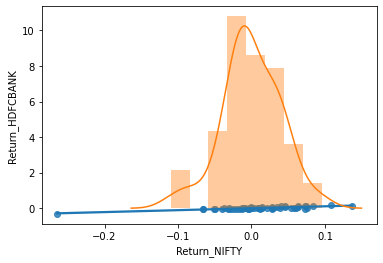

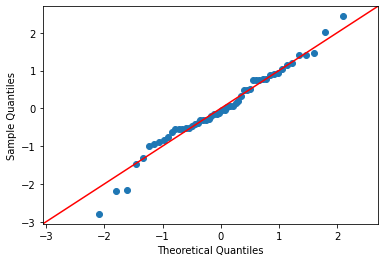

In [ ]:
HDFC_Lev_Beta = 1.0881
#Regression - Security Characteristic line
returns_HDFCBANK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_HDFCBANK', data = returns_HDFCBANK)

print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 39.06% > 5% ). Thus, we cannot reject the null hypothesis and 
thus error terms will follow a normal distribution.

Date
2017-07-06         NaN
2017-08-01         NaN
2017-09-01    0.017435
2017-10-01    0.027126
2017-11-01    0.023146
                ...   
2022-03-01    0.024942
2022-04-01   -0.043706
2022-05-01   -0.061414
2022-06-01   -0.073255
2022-07-01    0.065490
Name: Return_AXISBANK, Length: 62, dtype: float64


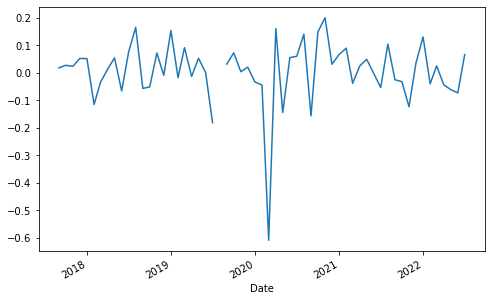

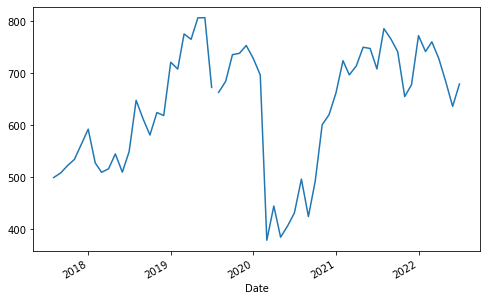

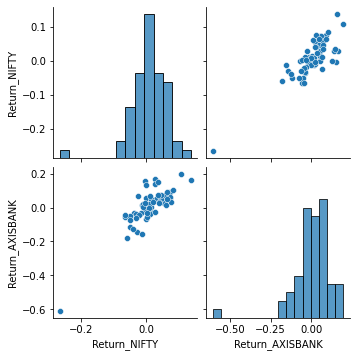

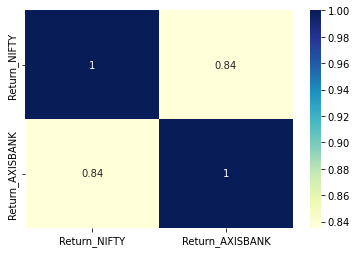

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Return_AXISBANK   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.62e-16
Time:                        23:56:07   Log-Likelihood:                 77.911
No. Observations:                  58   AIC:                            -151.8
Df Residuals:                      56   BIC:                            -147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0087      0.009     -1.014      0.315      -0.026       0.008
Return_NIFTY     1.6993      0.150     11.365      0.000       1.400       1.999
==============================================================================
Omnibus:                        1.949   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.285
Skew:                           0.345   Prob(JB):                        0.526
Kurtosis:                       3.237   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Caclulate log returns OF AXISBANK AND PLOT GRAPHS

AXISBANK_df['Return_AXISBANK'] = np.log(AXISBANK_df['Adj Close']/AXISBANK_df['Adj Close'].shift(1))
print(AXISBANK_df['Return_AXISBANK']) 

AXISBANK_df1 = AXISBANK_df.dropna(axis=0)
AXISBANK_df1.head()

AXISBANK_df['Return_AXISBANK'].plot(figsize=(8,5))
plt.show()


AXISBANK_df['Adj Close'].plot(figsize=(8,5))
plt.show()

AXISBANK_df1_returns = AXISBANK_df1['Return_AXISBANK']
AXISBANK_df1_returns.head()

returns_AXISBANK = pd.merge(nifty_df1_returns,AXISBANK_df1_returns,how='inner',on='Date')
returns_AXISBANK.head()
returns_AXISBANK.describe()

sns.pairplot(returns_AXISBANK)
plt.show()

sns.heatmap(returns_AXISBANK.corr(), annot = True, cmap="YlGnBu")
plt.show()

x = returns_AXISBANK['Return_NIFTY']
y = returns_AXISBANK['Return_AXISBANK']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Return_NIFTY     58 non-null     float64
 1   Return_AXISBANK  58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
resid Date
2017-09-01    0.048386
2017-10-01   -0.056573
2017-11-01    0.049772
2017-12-01    0.010801
2018-01-01   -0.018471
2018-02-01   -0.022557
2018-03-01    0.036065
2018-04-01   -0.080113
2018-05-01    0.062971
2018-06-01   -0.054344
2018-07-01   -0.015598
2018-08-01    0.126023
2018-09-01    0.064384
2018-10-01    0.043760
2018-11-01    0.002090
2018-12-01    0.001479
2019-01-01    0.167038
2019-02-01   -0.003669
2019-03-01   -0.026324
2019-04-01   -0.022887
2019-05-01    0.036218
2019-06-01    0.028160
2019-07-01   -0.073654
2019-09-01   -0.028230
2019-10-01    0.022281
2019-11-01   -0.013050
2019-12-01    0.013042
2020-01-01    0.004275

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=1.9493827660518281, pvalue=0.3773087794905465)

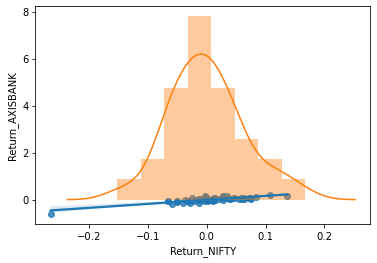

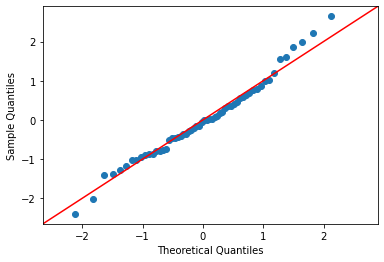

In [ ]:
AXIS_Lev_Beta = 1.7012
#Regression - Security Characteristic line
returns_AXISBANK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_AXISBANK', data = returns_AXISBANK)

print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 37.73% > 5% ). Thus, we cannot reject the null hypothesis and 
the it will give a normal distribution.

Date
2017-07-12         NaN
2017-08-01         NaN
2017-09-01    0.026540
2017-10-01    0.022494
2017-11-01   -0.024441
                ...   
2022-03-01   -0.049446
2022-04-01    0.020821
2022-05-01    0.030847
2022-06-01   -0.106001
2022-07-01    0.047583
Name: Return_KOTAKBANK, Length: 64, dtype: float64


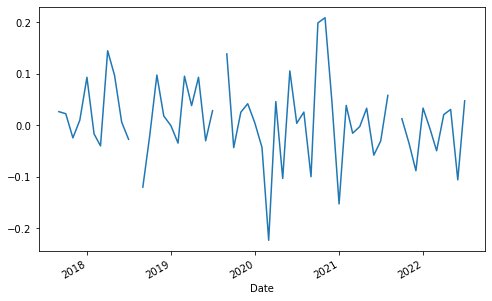

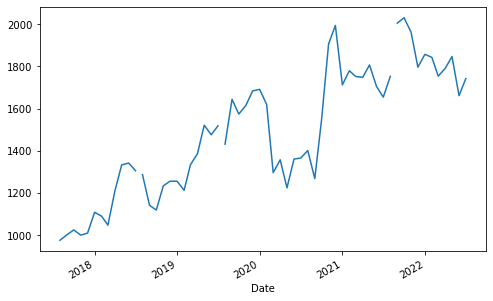

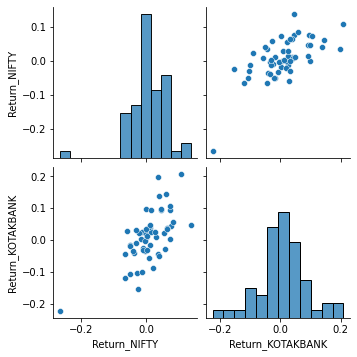

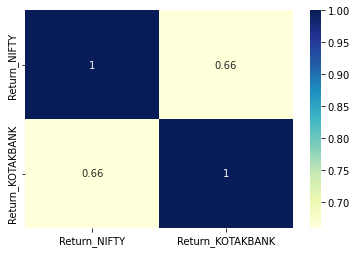

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Return_KOTAKBANK   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     41.68
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.14e-08
Time:                        23:56:09   Log-Likelihood:                 79.275
No. Observations:                  56   AIC:                            -154.5
Df Residuals:                      54   BIC:                            -150.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0024      0.008      0.297      0.768      -0.014       0.019
Return_NIFTY     0.9005      0.139      6.456      0.000       0.621       1.180
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.249
Skew:                           0.156   Prob(JB):                        0.883
Kurtosis:                       3.098   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Caclulate log returns OF KOTAKBANK AND PLOT GRAPHS

KOTAKBANK_df['Return_KOTAKBANK'] = np.log(KOTAKBANK_df['Adj Close']/KOTAKBANK_df['Adj Close'].shift(1))
print(KOTAKBANK_df['Return_KOTAKBANK']) 

KOTAKBANK_df1 = KOTAKBANK_df.dropna(axis=0)
KOTAKBANK_df1.head()

KOTAKBANK_df['Return_KOTAKBANK'].plot(figsize=(8,5))
plt.show()

KOTAKBANK_df['Adj Close'].plot(figsize=(8,5))
plt.show()

KOTAKBANK_df1_returns = KOTAKBANK_df1['Return_KOTAKBANK']
KOTAKBANK_df1_returns.head()

returns_KOTAKBANK = pd.merge(nifty_df1_returns,KOTAKBANK_df1_returns,how='inner',on='Date')
returns_KOTAKBANK.head()
returns_KOTAKBANK.describe()

sns.pairplot(returns_KOTAKBANK)
plt.show()

sns.heatmap(returns_KOTAKBANK.corr(), annot = True, cmap="YlGnBu")
plt.show()

x = returns_KOTAKBANK['Return_NIFTY']
y = returns_KOTAKBANK['Return_KOTAKBANK']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2017-09-01 to 2022-07-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Return_NIFTY      56 non-null     float64
 1   Return_KOTAKBANK  56 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
resid Date
2017-09-01    0.035963
2017-10-01   -0.028838
2017-11-01   -0.017310
2017-12-01   -0.018937
2018-01-01    0.049345
2018-02-01    0.025643
2018-03-01   -0.009243
2018-04-01    0.088392
2018-05-01    0.094977
2018-06-01    0.005678
2018-07-01   -0.082061
2018-09-01   -0.062708
2018-10-01    0.023702
2018-11-01    0.053735
2018-12-01    0.016892
2019-01-01   -0.000368
2019-02-01   -0.033745
2019-03-01    0.026157
2019-04-01    0.026294
2019-05-01    0.077623
2019-06-01   -0.022263
2019-07-01    0.078698
2019-09-01    0.100200
2019-10-01   -0.076946
2019-11-01    0.009687
2019-12-01    0.031171
2020-01-01    0.017391
2020-02-01    0.01

C:\Users\Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=0.5956737574943288, pvalue=0.7424224347486112)

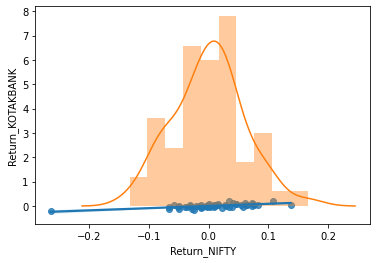

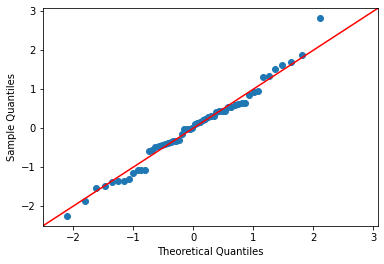

In [ ]:
KOTAK_Lev_Beta = 0.9019
#Regression - Security Characteristic line
returns_KOTAKBANK.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_KOTAKBANK', data = returns_KOTAKBANK)

print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

stats.normaltest(results.resid)

After performing normality test of errors we have obtained a p-value which is greater than 5%( 74.24% > 5% ). Thus, we cannot reject the null hypothesis and 
the it will give a normal distribution.

In [ ]:
icici = yf.Ticker("ICICIBANK.NS")
icici.balance_sheet

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Total Liab,1.564604e+13,1.406636e+13,1.247537e+13,1.117960e+13
Total Stockholder Equity,1.820525e+12,1.575875e+12,1.229601e+12,1.142534e+12
Minority Interest,5.980890e+10,9.588339e+10,6.794770e+10,6.580536e+10
Total Assets,1.752637e+13,1.573812e+13,1.377292e+13,1.238794e+13
Common Stock,1.389970e+10,1.383198e+10,1.294553e+10,1.289248e+10
Other Liab,3.116355e+12,2.502320e+12,1.882898e+12,1.802550e+12
Good Will,1.013300e+09,1.076700e+09,1.097000e+09,1.097000e+09
Treasury Stock,1.806625e+12,1.829624e+11,1.852938e+11,1.807532e+11
Other Assets,9.917069e+12,9.984054e+12,8.708299e+12,8.316601e+12
Cash,1.831260e+12,1.084100e+12,1.025108e+12,5.823600e+11


In [ ]:
icici.info

{'zip': '400051',
 'sector': 'Financial Services',
 'longBusinessSummary': 'ICICI Bank Limited provides various banking products and financial services in India and internationally. It operates through Retail Banking, Wholesale Banking, Treasury, Other Banking, Life insurance, General insurance, and Others segments. The company offers savings, salary, pension, current, and other accounts; and fixed, recurring, and security deposits. It also provides home, car, two wheeler, personal, gold, and commercial business loans, as well as loans against securities and other loans; business loans, such as working capital finance, term loans, collateral free loans, loans without financials, finance for importers and exporters, and secured loans for credit card swipes, as well as loans for new entities, and schools and colleges; and credit, debit, prepaid, travel, and corporate cards. In addition, the company offers insurance products; pockets wallet; fixed income products; investment products, suc

In [ ]:
icici_debt=icici.info['totalDebt']
print(icici_debt)

1616026796032


In [ ]:
icici_equity=icici.info['currentPrice']*icici.info['sharesOutstanding']
print(icici_equity)

5233641816268.8


In [ ]:
icici_DtoE=icici_debt/icici_equity
print(icici_DtoE)

0.30877672809181805


In [ ]:
ICICI_UnLev_Beta=(ICICI_Lev_Beta/(1+(1-Tax)*icici_DtoE))
print(ICICI_UnLev_Beta)

1.1215650988307893


In [ ]:
hdfc = yf.Ticker("HDFCBANK.NS")
hdfc.balance_sheet

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Capital Surplus,6.311916e+11,6.051268e+11,5.875553e+11,5.691052e+11
Total Liab,1.874888e+13,1.589064e+13,1.403895e+13,1.138631e+13
Total Stockholder Equity,2.473262e+12,2.098102e+12,1.763587e+12,1.536727e+12
Minority Interest,7.204100e+09,6.327600e+09,5.766413e+09,5.017945e+09
Other Current Liab,1.309374e+11,1.242419e+11,7.583721e+10,7.040395e+10
Total Assets,2.122934e+13,1.799507e+13,1.580830e+13,1.292806e+13
Common Stock,5.545500e+09,5.512800e+09,5.483286e+09,5.446613e+09
Other Current Assets,1.365507e+12,1.020680e+12,7.598626e+11,5.065307e+11
Retained Earnings,1.724726e+12,1.388635e+12,1.110957e+12,9.273012e+11
Other Liab,6.858334e+11,5.709830e+11,5.468736e+11,4.310762e+11


In [ ]:
hdfc.info

{'zip': '400013',
 'sector': 'Financial Services',
 'fullTimeEmployees': 141579,
 'longBusinessSummary': 'HDFC Bank Limited provides various banking and financial services to individuals and businesses in India, Bahrain, Hong Kong, and Dubai. It operates in Treasury, Retail Banking, Wholesale Banking, Other Banking Business, and Unallocated segments. The company accepts savings, salary, current, rural, public provident fund, pension, and Demat accounts; fixed and recurring deposits; and safe deposit lockers; as well as offshore accounts and deposits, overdrafts against fixed deposits, and sweep-in facilities. It also provides personal, home, car, two wheeler, business, educational, gold, consumer, and rural loans; loans against properties, securities, rental receivables, and assets; loans for professionals; government sponsored programs; and loans on credit card, as well as working capital and commercial/construction equipment finance, healthcare/medical equipment and commercial vehicl

In [ ]:
hdfc_debt=hdfc.info['totalDebt']
print(hdfc_debt)

2269665034240


In [ ]:
hdfc_equity=hdfc.info['currentPrice']*hdfc.info['sharesOutstanding']
print(hdfc_equity)

7505487848832.0


In [ ]:
hdfc_DtoE=hdfc_debt/hdfc_equity
print(hdfc_DtoE)

0.3024007339633764


In [ ]:
HDFC_UnLev_Beta=(HDFC_Lev_Beta/(1+(1-Tax)*hdfc_DtoE))
print(HDFC_UnLev_Beta)

0.8869412388027472


In [ ]:
kotak = yf.Ticker("KOTAKBANK.NS")
kotak.balance_sheet

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Total Liab,4.493326e+12,3.940341e+12,3.760357e+12,3.368894e+12
Total Stockholder Equity,9.716534e+11,8.433860e+11,6.663698e+11,5.778180e+11
Total Assets,5.464979e+12,4.788727e+12,4.431727e+12,3.951712e+12
Common Stock,9.923300e+09,9.909178e+09,9.565192e+09,9.543774e+09
Other Current Assets,1.428516e+11,1.540617e+11,1.171031e+11,1.294323e+11
Other Liab,8.409741e+11,6.309043e+11,4.712830e+11,4.185029e+11
Good Will,8.137500e+09,8.137530e+09,8.137530e+09,8.137530e+09
Treasury Stock,9.617301e+11,9.119627e+09,9.425463e+09,6.930862e+09
Other Assets,3.265796e+12,2.672881e+12,2.612930e+12,2.544355e+12
Cash,3.838033e+11,3.667818e+11,5.629641e+11,2.160804e+11


In [ ]:
kotak.info

{'zip': '400051',
 'sector': 'Financial Services',
 'longBusinessSummary': 'Kotak Mahindra Bank Limited, provides banking and financial services to corporate and individual customers in India. It operates through Treasury, BMU, and Corporate Centre; Retail Banking; Corporate/Wholesale Banking; Vehicle Financing; Other Lending Activities; Broking; Advisory and Transactional Services; Asset Management; and Insurance segments. The Treasury, BMU and Corporate Centre segment engages in dealing in debt, equity, money and forex market, derivatives, and investments; and the primary dealership of government securities and balance sheet management unit (BMU) responsible for asset liability management. The Retail Banking segment offers commercial vehicle finance, personal, home, and other loans/services, and agriculture finance services. This segment also provides savings, current, and term deposit accounts; branch banking network and services, including distribution of financial products; and cr

In [ ]:
kotak_debt=kotak.info['totalDebt']
print(kotak_debt)

551482687488


In [ ]:
kotak_equity = kotak.info['currentPrice']*kotak.info['sharesOutstanding']
print(kotak_equity)

3514310399820.8


In [ ]:
kotak_DtoE=kotak_debt/kotak_equity
print(kotak_DtoE)

0.15692486569089656


In [ ]:
KOTAK_UnLev_Beta=(KOTAK_Lev_Beta/(1+(1-Tax)*hdfc_DtoE))
print(KOTAK_UnLev_Beta)

0.7351643261429994


In [ ]:
Industry_UnLev_Beta = (ICICI_UnLev_Beta + HDFC_UnLev_Beta + KOTAK_UnLev_Beta)/3
print(Industry_UnLev_Beta)

0.9145568879255119


In [ ]:
baroda = yf.Ticker('BANKBARODA.NS')
baroda.balance_sheet

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Capital Surplus,3.143095e+11,4.260889e+11,3.822115e+11,1.613255e+11
Total Liab,1.247511e+13,1.119850e+13,1.123452e+13,7.643345e+12
Total Stockholder Equity,9.186808e+11,8.238958e+11,7.610430e+11,5.499612e+11
Minority Interest,7.577801e+09,4.361961e+09,3.861746e+09,3.413648e+09
Other Current Liab,5.722058e+10,2.852088e+10,6.072342e+10,3.009816e+10
Total Assets,1.340137e+13,1.202676e+13,1.199942e+13,8.196719e+12
Common Stock,1.034272e+10,1.034272e+10,9.241133e+09,5.291032e+09
Other Current Assets,6.942330e+11,5.230388e+11,4.478898e+11,3.701653e+11
Retained Earnings,4.043493e+11,2.264153e+11,2.062741e+11,2.479884e+11
Other Liab,5.199270e+11,4.534980e+11,4.326136e+11,2.302032e+11


In [ ]:
baroda.info

{'zip': '390007',
 'sector': 'Financial Services',
 'fullTimeEmployees': 79806,
 'longBusinessSummary': 'Bank of Baroda provides various banking products and services to individuals, government departments, and corporate customers. The company operates through Treasury, Corporate/Wholesale Banking, Retail Banking, and Other Banking Operations segments. It offers savings and current accounts; term, fixed and recurring deposits; and NRI deposit products. The company also provides loans, such as home, education, vehicle, gold, mudra, personal, and mortgage loans, as well as loans against securities and public issues/IPO; professional, composite, bridge, FCNR, and short and medium-term corporate loans, as well as loans for micro, small, and medium enterprises; working capital finance, term finance, commercial vehicle finance, export finance, advances against shares, bill finance, lines of credit, loans against rent receivables, project finance, infrastructure finance, supply chain finance,

In [ ]:
baroda_debt=baroda.info['totalDebt']
print(baroda_debt)

1095261093888


In [ ]:
baroda_equity=baroda.info['currentPrice']*baroda.info['sharesOutstanding']
print(baroda_equity)

544027045068.8


In [ ]:
baroda_DtoE = baroda_debt/baroda_equity
print(baroda_DtoE)

2.0132475100562117


In [ ]:
BARODA_Lev_Beta_BottomUp = Industry_UnLev_Beta*(1+(1-Tax)*baroda_DtoE)
print(BARODA_Lev_Beta_BottomUp)

2.295478920991108


In [ ]:
#Calculating Cost of Equity

In [ ]:
BARODA_CostOfEquity_BottomUp = R_f + BARODA_Lev_Beta_BottomUp*(R_m - R_f)
print(BARODA_CostOfEquity_BottomUp)

0.1923123265636762


In [ ]:
#Thus using the CAPM model, the cost of equity for Bank of Baroda using the BOTTOM UP approach comes out to be 19.17%(approx)

![Income%20Statement%20BANKBARODA.jpg](attachment:Income%20Statement%20BANKBARODA.jpg)



In [ ]:
BARODA_InterestCoverage = 46665.16/38815.47
print(BARODA_InterestCoverage)

1.2022309661585961


In [ ]:
#Assuming Bank of Baroda to be a large market capitalization firm, we will calculate its credit spreads from the following chart

![Screenshot%202022-07-13%20120310.jpg](attachment:Screenshot%202022-07-13%20120310.jpg)

In [ ]:
#Thus the credit spread for BANKNBARODA stock will be 10% with an interest coverage ratio of approximately 1.20
BARODA_spread = 0.1

In [ ]:
#We have already calculated the risk free rate of debt previously as R_f which comes out to be approximately 6.77567%

In [ ]:
BARODA_CostOfDebt = R_f + BARODA_spread
print(BARODA_CostOfDebt)

0.16775666666666667


In [ ]:
#Bank of Baroda's cost of debt based on its latest financials should be 16.77% approximately

In [ ]:
#___________________________Calcualting WACC_____________________________#

In [ ]:
#For Top Down Approach

WACC_TD = BARODA_CostOfDebt*(1-Tax)*(baroda_debt/(baroda_debt+baroda_equity)) +  BANKBARODA_CostOfEquity_TopDown*(baroda_equity/(baroda_debt+baroda_equity))
print(WACC_TD)

0.1337440227808494


In [ ]:
#Thus, using Top Down approach we get WACC = 13.37% approximately

In [ ]:
#For Bottom Up Approach

WACC_BU =  BARODA_CostOfDebt*(1-Tax)*(baroda_debt/(baroda_debt+baroda_equity)) +  BARODA_CostOfEquity_BottomUp*(baroda_equity/(baroda_debt+baroda_equity))
print(WACC_BU)

0.14788499573068947


In [ ]:
#Thus, using Bottom Up approach we get WACC = 14.78% approximately